In [76]:
from sklearn.metrics  import classification_report
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
heart_df=pd.read_csv('Heart Attack.csv')
heart_df.head(4)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive


In [78]:
heart_df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [79]:
heart_df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [80]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [81]:
dummies=pd.get_dummies(heart_df['class'])
dummies.head(4)

,negative,positive
0,1,0
1,0,1
2,1,0
3,0,1


In [ ]:
#  df['class']=df['class'].map({'negative':0,'positive':1})
#  df.head(3)

In [82]:
heart_df=pd.concat([heart_df,dummies],axis='columns')
heart_df.head(2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,negative,positive
0,64,1,66,160,83,160.0,1.80,0.012,negative,1,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,1


In [83]:
heart_df=heart_df.drop(['class','negative'],axis='columns')
heart_df.head(2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,positive
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1


In [84]:
X=heart_df.drop(['positive'],axis='columns')
y=heart_df['positive']

In [85]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
466,60,0,79,120,68,162.0,0.665,5.480
831,72,0,59,125,72,121.0,1.330,0.005
929,60,1,78,109,69,93.0,4.600,0.019
935,70,0,80,90,41,85.0,1.290,6.010
495,41,0,82,107,57,135.0,1.030,0.003


In [86]:
# here StandardScaler() means z = (x - u) / s
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
541,44,0,59,106,58,93.0,3.68,0.008
582,60,0,78,169,80,117.0,1.18,2.810
503,70,0,69,94,55,88.0,5.33,0.019
726,40,1,91,120,80,101.0,2.74,0.005
138,56,1,79,85,44,97.0,1.28,0.006


In [87]:
# logisitc regressor

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
solver=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
fit_intercept=['True']
best_solver=''
train_score=np.zeros(6)
for i, n in enumerate(solver):
    lr=LogisticRegression(solver=n,max_iter=1000).fit(X_train,y_train)
    train_score[i]=lr.score(X_test,y_test)
    if lr.score(X_test,y_test)==train_score.max():
        best_solver=n

lr=LogisticRegression(solver=best_solver,max_iter=1000)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(f'LogisticRegression score: {accuracy_score(y_test,lr_pred)}')    
    

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression score: 0.7803030303030303


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [89]:
from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
# kflod=KFold(n_splits=5,test_size=0.2,random_state=0)

In [90]:
results=(cross_val_score(lr,X_train,y_train,cv=cv))
print(results)
print('\n')
# output the accuracy calculates mean and std also 
print("accuracy : %.3f%%(%.3f%%)"%(results.mean()*100 , results.std()*100))

[0.80094787 0.83886256 0.82464455 0.81042654 0.78672986]


accuracy : 81.232%(1.813%)


In [91]:
#  support vector machine (svm)
from sklearn.svm import SVC
from sklearn.metrics import f1_score
kernels={'linear':0,'poly':0,'rbf':0,'sigmoid':0}
best=''
for i in kernels:
    svm=SVC(kernel=i)
    svm.fit(X_train,y_train)
    yhat=svm.predict(X_test)
    kernels[i]=f1_score(y_test,yhat,average='weighted')
    if kernels[i]==max(kernels.values()):
        best=i
svm=SVC(kernel=best)
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
print(f'svm f1_score kernel({best}):{f1_score(y_test,svm_pred)}')


svm f1_score kernel(linear):0.8250825082508251


In [92]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'random_state':[0,42]
    
}
grid_search=GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(X_train,y_train)
Ctree=DecisionTreeClassifier(**grid_search.best_params_,class_weight='balanced')
Ctree.fit(X_train,y_train)



DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [93]:
dtc_pred=Ctree.predict(X_test)
print("decissionTree's Accuracy : ",accuracy_score(y_test,dtc_pred))

decissionTree's Accuracy :  0.9848484848484849


In [94]:
# KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

ks=50
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))

for n in range(1,ks):
    
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
best_k=mean_acc.argmax()+1
knn=KNeighborsClassifier(n_neighbors=best_k).fit(X_train,y_train)

knn_pred=neigh.predict(X_test)
print("the best accuracy was",accuracy_score(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

the best accuracy was 0.6931818181818182


              precision    recall  f1-score   support

           0       0.68      0.44      0.53       105
           1       0.70      0.86      0.77       159

    accuracy                           0.69       264
   macro avg       0.69      0.65      0.65       264
weighted avg       0.69      0.69      0.68       264



In [96]:
#  rfc and adaboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

def find_best_model(X_train,y_train):
    algorithms={
        'rfc':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators': [25, 50, 100, 150],
                'max_features': ['sqrt', 'log2', None],
                'max_depth': [3, 6, 9],
                'max_leaf_nodes': [3, 6, 9],
                
            }
        },
        'adaboost':{
            'model':AdaBoostClassifier(),
            'params':{
                'n_estimators': [25, 50, 100, 150],
                'algorithm':['SAAME','SAAMME.R'],
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algorithms.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train,y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X_train,y_train)

#  .............
    

KeyboardInterrupt: 

In [97]:
#  model evaluation 
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
def print_score(test,pred,model):
    # fig,ax=plt.subplots(1,2,figsize=(15,5))
    # sns.heatmap(confusion_matrix(test,pred),annot=True,)
    # plt.xlabel('predicted values')
    # plt.ylabel('actual values')
    # ax=sns.distplot(test,color='r',label='Actual value',hist=False)
    # sns.distplot(pred,color='b',label='Predicted Value',hist=False)
    # plt.title(f'Actual vs Predicted value{model}')
    # plt.xlabel('outcome')
    # plt.ylabel('count')
    # plt.show()
    Metrics={'Metrics':['accuracy score','f1 score','mean absolute error',
                        'mean squared error','R2 score'],
             'Scores':[accuracy_score(test,pred),f1_score(test,pred),
                       mean_absolute_error(test,pred),mean_squared_error(test,pred),
                       r2_score(test,pred)]}
    df=pd.DataFrame(Metrics)
    return df

In [98]:
#  evaluating Logistic Regression model
print_score(y_test,lr_pred,'Logistic Regression')

,Metrics,Scores
0,accuracy score,0.780303
1,f1 score,0.815287
2,mean absolute error,30.045455
3,mean squared error,0.219697
4,R2 score,0.082839


In [99]:
# evaluating svm moodel
print_score(y_test,svm_pred,'SNM')

,Metrics,Scores
0,accuracy score,0.799242
1,f1 score,0.825083
2,mean absolute error,32.912879
3,mean squared error,0.200758
4,R2 score,0.161905


In [106]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       105
           1       0.87      0.79      0.83       159

    accuracy                           0.80       264
   macro avg       0.79      0.80      0.79       264
weighted avg       0.81      0.80      0.80       264



In [100]:
# evaluating decision tree
print_score(y_test,dtc_pred,'DecisionTreeClassifier')

,Metrics,Scores
0,accuracy score,0.984848
1,f1 score,0.987500
2,mean absolute error,0.977273
3,mean squared error,0.015152
4,R2 score,0.936748


In [105]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.98      0.99      0.99       159

    accuracy                           0.98       264
   macro avg       0.99      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [101]:
# evaluating knn model
print_score(y_test,knn_pred,'KNN')

,Metrics,Scores
0,accuracy score,0.693182
1,f1 score,0.771831
2,mean absolute error,21.473485
3,mean squared error,0.306818
4,R2 score,-0.280863


In [102]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.68      0.44      0.53       105
           1       0.70      0.86      0.77       159

    accuracy                           0.69       264
   macro avg       0.69      0.65      0.65       264
weighted avg       0.69      0.69      0.68       264



In [103]:
# 
# 
# 
# comparing the rfc rfc model and adaboost model

Text(0.5, 1.0, ' comparision of different models')

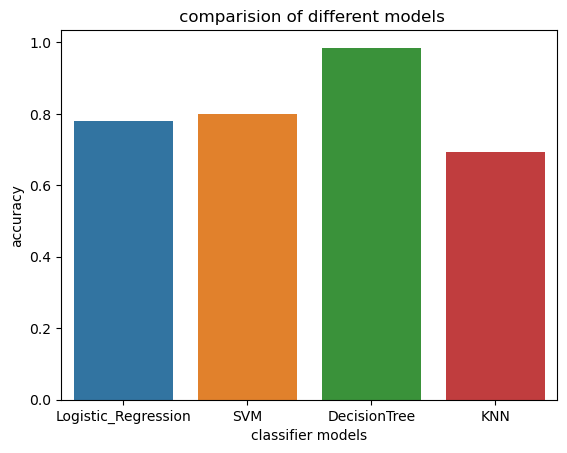

In [104]:
#  comparing the accuracy of different models
models=['Logistic_Regression','SVM','DecisionTree','KNN']
preds=[lr_pred,svm_pred,dtc_pred,knn_pred]
accuracys=[]
for i  in preds:
    accuracys.append(accuracy_score(y_test,i))
sns.barplot(x=models,y=accuracys)
plt.xlabel('classifier models')
plt.ylabel('accuracy')
plt.title(' comparision of different models')
